In [1]:
import os
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [2]:
def preprocess_image(image_path, threshold=125):
    """
    Preprocesses an image by binarizing it based on a given threshold.

    Args:
        image_path (str): Path to the image.
        threshold (int): Threshold for binarization (0-255). Defaults to 125.

    Returns:
        np.ndarray: Binarized image array.
    """
    img = mpimg.imread(image_path)
    if img.ndim == 3:  # Convert RGB to grayscale if necessary
        img = np.mean(img, axis=2)
    binary_img = (img > threshold / 255.0).astype(float)
    return binary_img

def crop_whitespace(image):
    """
    Crops the whitespace from the image by detecting the first non-white pixel 
    on all sides (top, bottom, left, right).

    Args:
        image (np.ndarray): Binarized image array.

    Returns:
        np.ndarray: Cropped image.
    """
    non_white_rows = np.any(image != 1, axis=1)  # Rows where any pixel is not white
    non_white_cols = np.any(image != 1, axis=0)  # Columns where any pixel is not white

    top = np.argmax(non_white_rows)
    bottom = len(non_white_rows) - np.argmax(non_white_rows[::-1]) - 1
    left = np.argmax(non_white_cols)
    right = len(non_white_cols) - np.argmax(non_white_cols[::-1]) - 1

    cropped_image = image[top:bottom+1, left:right+1]
    return cropped_image

In [3]:
output_folder = 'cropped_images'
# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

reference_image = cv2.imread('oscii_data\images\\21 original.png', cv2.IMREAD_GRAYSCALE)
cropped_reference_image = crop_whitespace(preprocess_image("oscii_data\images\\21 original.png"))
# List of image file names to compare with the reference image
titles = ["Original Image", "AISS", "Neural Network", 
              "k-NN", "SVM", "Random Forest", 
            "k-NN no HOG", "SVM no HOG", "Random Forest no HOG", 
              "CNN", "ResNet", "MobileNetV2", "AAConverter"]
image_filenames = ['oscii_data\images\\21 original.png', 'examples\oscii_ex_catgirl\inverted_aiss.png', 'examples\oscii_ex_catgirl\inverted_nn.png',
    'examples\oscii_ex_catgirl\inverted_knn.png', 'examples\oscii_ex_catgirl\inverted_svm.png', 'examples\oscii_ex_catgirl\inverted_rforest.png', 
    'examples\oscii_ex_catgirl\inverted_knn_no_hog.png', 'examples\oscii_ex_catgirl\inverted_svm_no_hog.png', 'examples\oscii_ex_catgirl\inverted_rforest_no_hog.png', 
     'examples\oscii_ex_catgirl\inverted_cnn.png', 'examples\oscii_ex_catgirl\inverted_resnet.png', 'examples\oscii_ex_catgirl\inverted_mobile.png', 
           'examples\oscii_ex_catgirl\\aaconverter.png'
     ] 

<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:12: SyntaxWarning: invalid escape sequence '\i'
<>:12: SyntaxWarning: invalid escape sequence '\o'
<>:12: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:12: SyntaxWarning: invalid escape sequence '\i'
<>:12: SyntaxWarning: invalid escape sequence '\o'
<>:12: SyntaxWarning: invalid escap

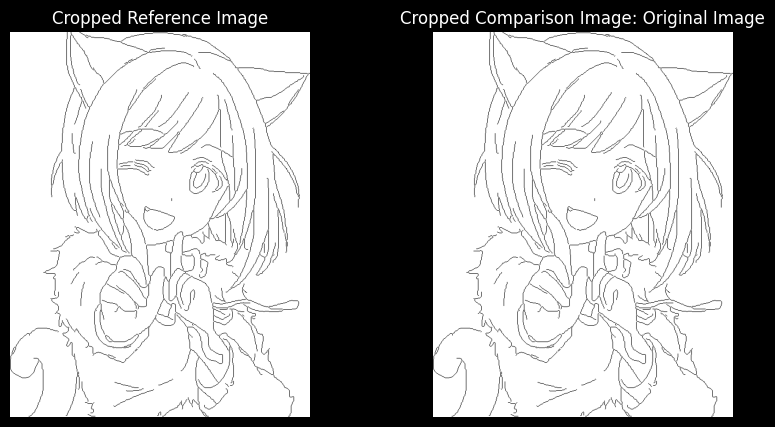

SSIM between cropped reference_image and Original Image: 1.0000


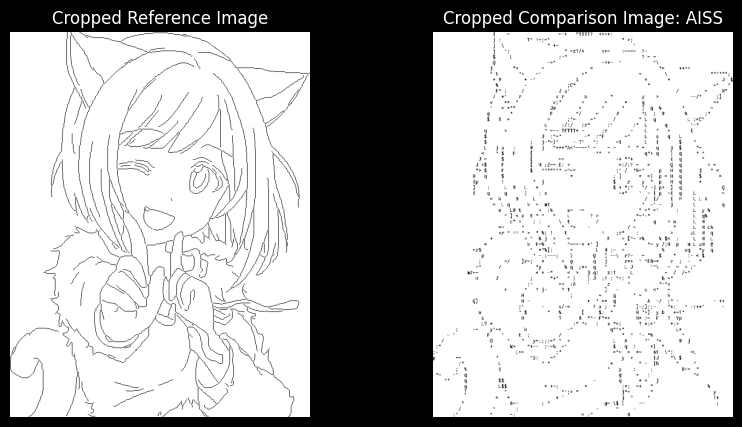

SSIM between cropped reference_image and AISS: 0.6638


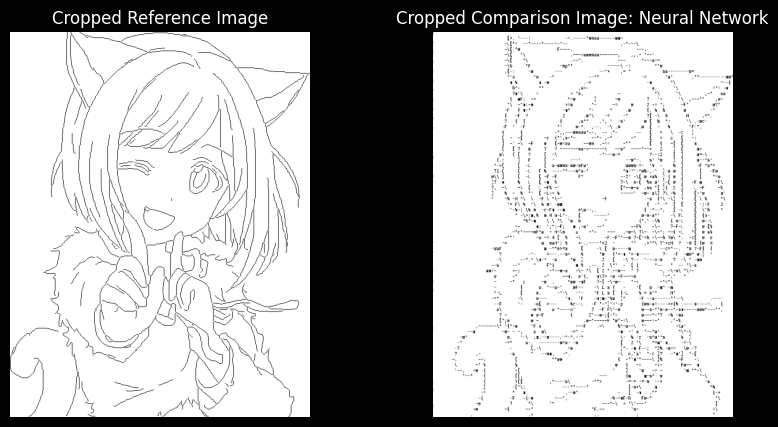

SSIM between cropped reference_image and Neural Network: 0.5195


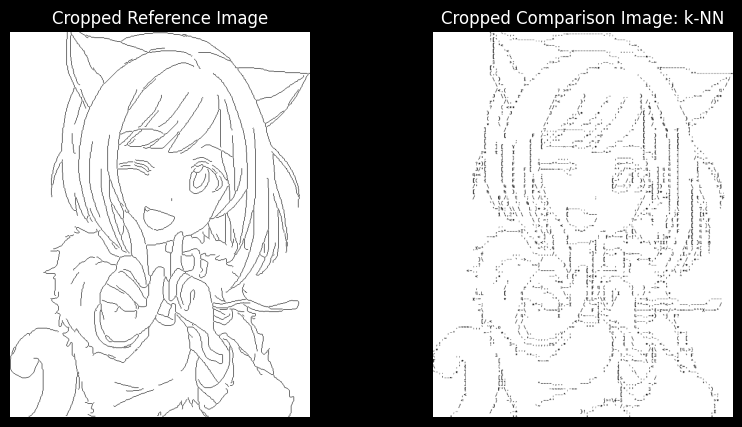

SSIM between cropped reference_image and k-NN: 0.6756


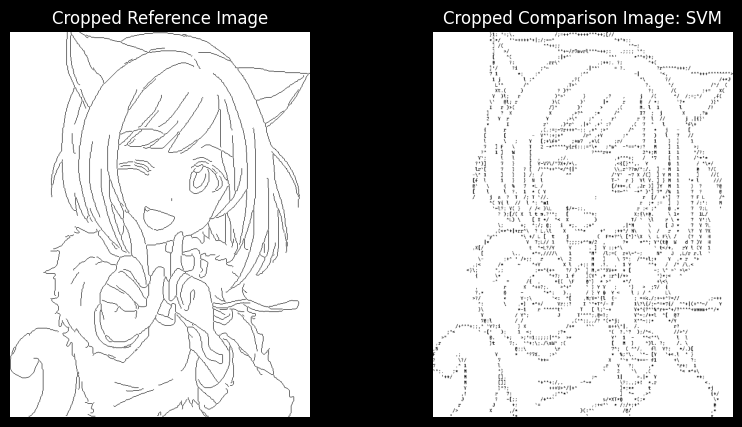

SSIM between cropped reference_image and SVM: 0.6460


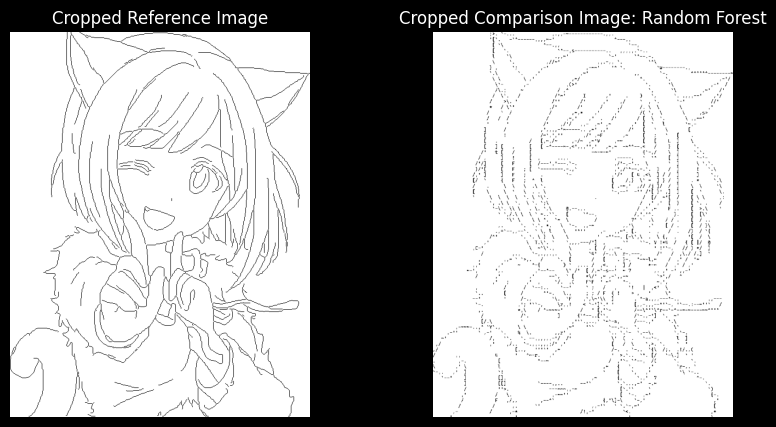

SSIM between cropped reference_image and Random Forest: 0.6839


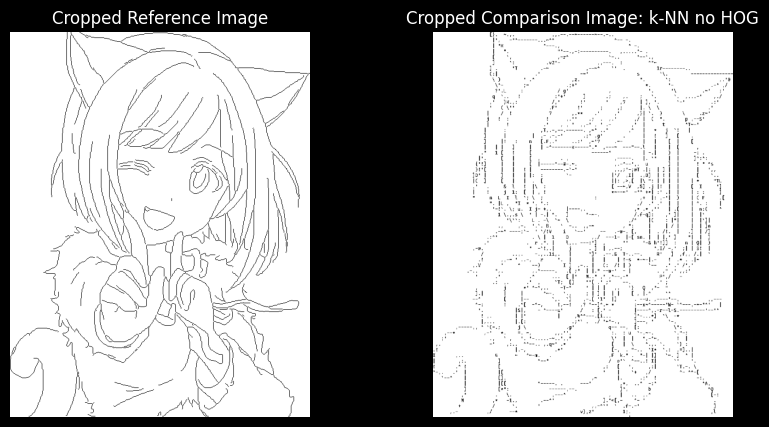

SSIM between cropped reference_image and k-NN no HOG: 0.6701


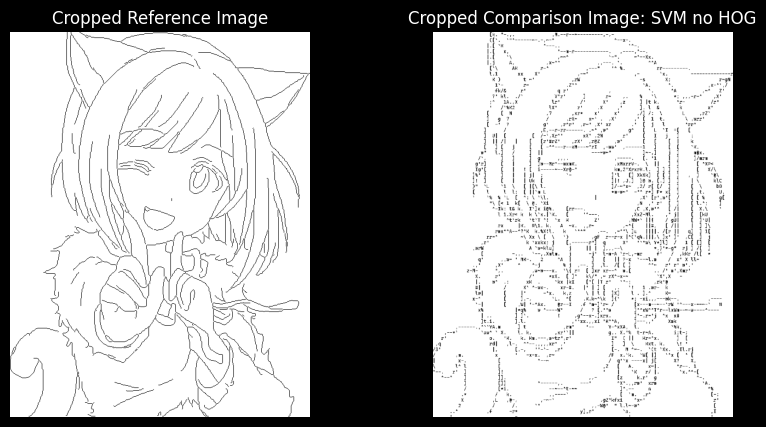

SSIM between cropped reference_image and SVM no HOG: 0.6483


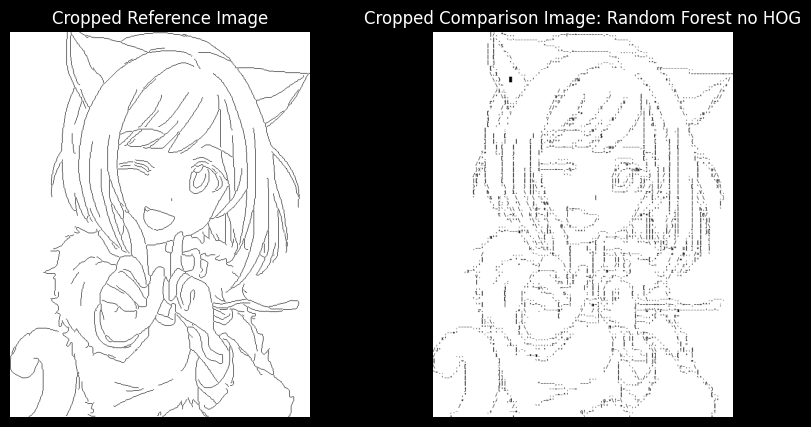

SSIM between cropped reference_image and Random Forest no HOG: 0.6603


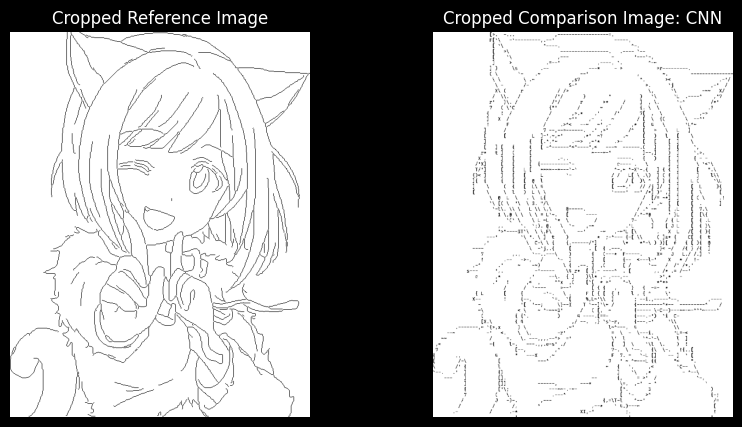

SSIM between cropped reference_image and CNN: 0.6798


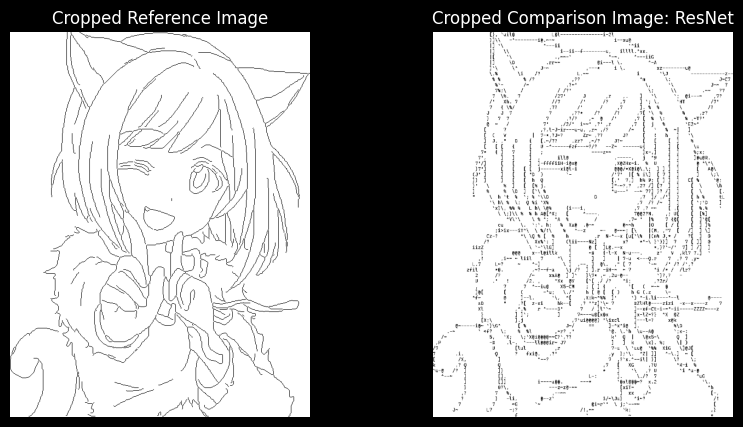

SSIM between cropped reference_image and ResNet: 0.6314


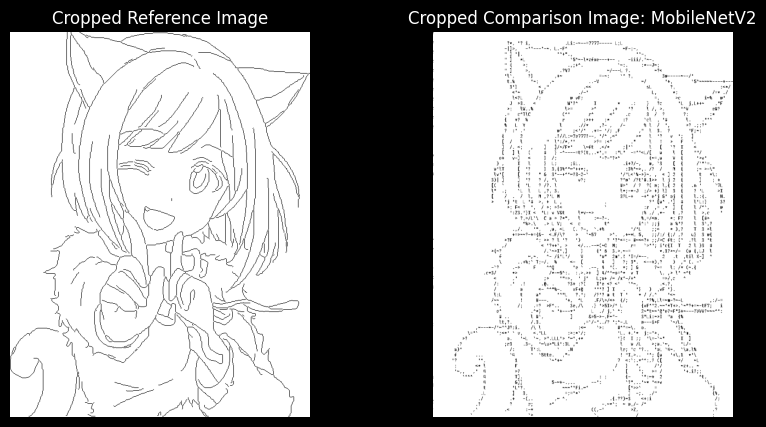

SSIM between cropped reference_image and MobileNetV2: 0.5153


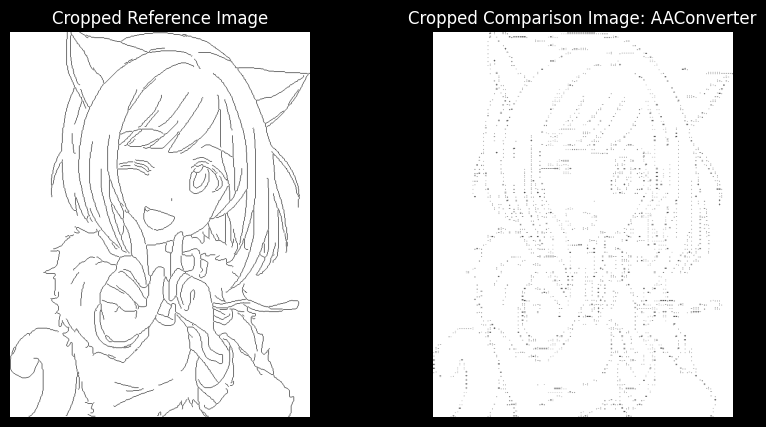

SSIM between cropped reference_image and AAConverter: 0.6850


In [4]:
# Loop over each image in the list and show the cropped images
i=0
# Set the figure's background to black and text to white
plt.rcParams['axes.facecolor'] = 'black'  # Set axes background color to black
plt.rcParams['text.color'] = 'white'  # Set text color to white
plt.rcParams['axes.labelcolor'] = 'white'  # Set axis label color to white
plt.rcParams['xtick.color'] = 'white'  # Set x-axis tick color to white
plt.rcParams['ytick.color'] = 'white'  # Set y-axis tick color to white


for filename in image_filenames:
    # Preprocess (binarize) the comparison image
    comparison_image = preprocess_image(filename)

    # Crop whitespace from the comparison image
    cropped_comparison_image = crop_whitespace(comparison_image)

    # Ensure both cropped images have the same dimensions for SSIM calculation
    if cropped_reference_image.shape != cropped_comparison_image.shape:
        # print(f"The images {filename} have different dimensions after cropping. Resizing...")
        cropped_comparison_image = cv2.resize(cropped_comparison_image, (cropped_reference_image.shape[1], cropped_reference_image.shape[0]))

    # Show the cropped reference image and the cropped comparison image
    plt.figure(figsize=(10, 5))
    plt.gcf().patch.set_facecolor('black')
    plt.subplot(1, 2, 1)
    plt.title(f'Cropped Reference Image')
    plt.imshow(cropped_reference_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'Cropped Comparison Image: {titles[i]}')
    plt.imshow(cropped_comparison_image, cmap='gray')
    plt.axis('off')

    plt.show()

    # Compute SSIM between the cropped reference image and the cropped comparison image
    ssim_value, _ = ssim(cropped_reference_image, cropped_comparison_image, full=True, data_range=1.0)

    # Print the SSIM value for the comparison
    print(f"SSIM between cropped reference_image and {titles[i]}: {ssim_value:.4f}")
    i+=1